In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter
import pandas as pd
import Error
from matplotlib import reload
import matplotlib.pyplot as plt
reload(Error)

<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [7]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [8]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    y = processed.split()
    return y
def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
    return data[name]

In [9]:
train_data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
train_data=train_data.dropna()

In [10]:
train_data=train_data.sample(frac=1.0, replace=True)
train=train_data.sample(frac=0.90,random_state=120)
test=train_data.drop(train.index)
train.head()

,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
83062,NCG3D-16500,DTMF inputs not taken during Active call on pr...,Closed,2016-06-14 12:51:59,SW_SPEECH,h4. Test Environment :\n* HW Sample : Scope2\n...,2016-07-12 07:18:12
24614,NCG3D-11200,"<Power on/off testing> After ID:XM6-170, Altho...",Closed,2016-03-11 11:31:46,"SW_FRAMEWORK_HMI,SW_SPM",{color:red} !!! Customer Ticket !!! {color} \n...,2016-06-13 02:41:08
36928,NCG3D-84916,[HMI] After twice factory reset screen brightn...,Closed,2018-01-30 14:06:37,SW_SYSTEM,h4. Test Environment :\n* HW Sample :BDV2 samp...,2018-05-24 12:25:56
58188,NCG3D-64700,No Android Auto short cut shown in Home screen.,Closed,2017-08-21 11:33:17,SW_SMARTPHONE,h4. Test Environment :\n* HW Sample : \n* Devi...,2018-05-18 08:55:03
79230,NCG3D-76157,AIVIBP-5405 HMI : UPA rear only is display lik...,Closed,2017-11-16 06:31:20,SW_PARKASSIST,{color:red} !!! Customer Ticket !!! {color} \n...,2018-02-09 11:33:36


In [11]:
train_clean_sentences = []
for line_number in range(len(train)):
    line = train.iloc[line_number]['Summary']
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    train_clean_sentences.append(cleaned)

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_clean_sentences)

In [13]:
train_traget=replace_strings(train,'Component/s')


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
test_traget=replace_strings(test,'Component/s')


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
test_clean_sentences = []
for line_number in range(len(test)):
    line = test.iloc[line_number]['Summary']
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    test_clean_sentences.append(cleaned)
Test = vectorizer.transform(test_clean_sentences)

In [24]:
Accuracy=[]
for i in range(1,50):
    modelknn = KNeighborsClassifier(n_neighbors=i)
    modelknn.fit(X,train_traget)
    predicted_labels_knn = modelknn.predict(Test)
    Accuracy.append(np.mean(test['Component/s']==predicted_labels_knn))
    print("For neigbours :",i,"Accuracy is :",np.mean(test_traget==predicted_labels_knn))

For neigbours : 1 Accuracy is : 0.5827873734365694
For neigbours : 2 Accuracy is : 0.56789755807028
For neigbours : 3 Accuracy is : 0.5732578916021441
For neigbours : 4 Accuracy is : 0.5738534842167957
For neigbours : 5 Accuracy is : 0.5824895771292437
For neigbours : 6 Accuracy is : 0.5854675402025015
For neigbours : 7 Accuracy is : 0.5935080405002978
For neigbours : 8 Accuracy is : 0.6030375223347231
For neigbours : 9 Accuracy is : 0.6030375223347231
For neigbours : 10 Accuracy is : 0.6021441334127456
For neigbours : 11 Accuracy is : 0.6033353186420488
For neigbours : 12 Accuracy is : 0.6063132817153067
For neigbours : 13 Accuracy is : 0.6072066706372841
For neigbours : 14 Accuracy is : 0.6095890410958904
For neigbours : 15 Accuracy is : 0.6072066706372841
For neigbours : 16 Accuracy is : 0.6110780226325193
For neigbours : 17 Accuracy is : 0.6107802263251936
For neigbours : 18 Accuracy is : 0.6131625967837999
For neigbours : 19 Accuracy is : 0.6110780226325193
For neigbours : 20 Accu

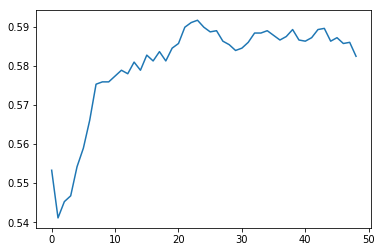

In [20]:
plt.plot(Accuracy)

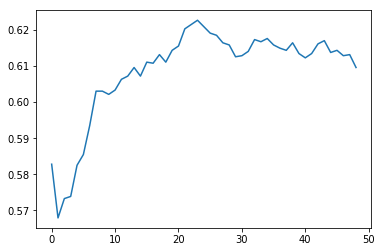

In [25]:
plt.plot(Accuracy)

In [27]:
Error.err.class_err(test_traget,predicted_labels_knn)

SW_SMARTPHONE 0.7543859649122807
SW_PHONE 0.6676829268292683
SW_TUNER_AMFM 0.6989247311827957
SW_NAVIGATION 0.9079159935379645
SW_NAVIGATION_JPN 0.2727272727272727
SW_PARKASSIST 0.8416666666666667
SW_WIFI 0.6333333333333333
SW_DIAGNOSTIC 0.6777777777777778
SW_SYSTEM 0.4421052631578947
Production-Test 0.0
SW_INFOTAINMENT 0.7413127413127413
SW_METER 0.5185185185185185
SW_TUNER_TV 0.4166666666666667
SW_FRAMEWORK_HMI 0.02912621359223301
SW_OTAS 0.45
SW_HOME_MENU 0.47058823529411764
SW_DRIVEASSIST 0.631578947368421
SW_AUDIO 0.22058823529411764
SW_TELEMATIC 0.5816326530612245
Mechanic 0.625
SW_SPEECH 0.589041095890411
SW_ARCHITECTURE 0.4
SW_Resets 0.5
SW_TUNER_SXM 0.6796116504854369
SW_SPM 0.125
SW_Master_HMI 0.0684931506849315
TEST_FEP 0.34782608695652173
SW_SWUPDATE 0.6666666666666666
TEST_EMC 1.0
SW_Obigo 0.0
SW_TRANSLATIONS 0.1
SW_TUNER_HD 0.7142857142857143
HW-General 0.15384615384615385
SW_NETWORKING 0.0
SW_GRAPHICS 0.0
SW_DATA 0.0
SW_TUNER_DAB 0.35714285714285715
Production-General 0.